## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [14]:
import os
from keras.layers import Input, Dense
import itertools

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [15]:
train, test = keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [17]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:

from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units = 10):
    
    input_layer = Input(input_shape, name = "main_input")
    
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units = 512, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    
    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [19]:
"""Code Here
設定超參數
"""
lr = 1e-3
epochs = 50
batch_sizes = [8, 16, 32, 128, 256]

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch_size in batch_sizes:
  keras.backend.clear_session()
  model = build_mlp(x_train.shape[1:])
  optimizer = keras.optimizers.Adam(lr = lr)
  
  model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
  history = model.fit(x_train, y_train, batch_size = batch_size, epochs =epochs, shuffle = True, validation_data = [x_test, y_test])
  
  name_tag = str(batch_size)
  results[name_tag] = {
      'train_loss' : history.history['loss'],
      'valid_loss' : history.history['val_loss'],
      'train_acc' : history.history['acc'],
      'valid_acc' : history.history['val_acc']
  }

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 311s 6ms/step - loss: 2.0147 - acc: 0.2752 - val_loss: 1.9592 - val_acc: 0.2920
Epoch 2/50
50000/50000 [==============================] - 331s 7ms/step - loss: 1.8885 - acc: 0.3240 - val_loss: 1.7208 - val_acc: 0.3970
Epoch 3/50
50000/50000 [==============================] - 303s 6ms/step - loss: 1.8195 - acc: 0.3547 - val_loss: 1.7432 - val_acc: 0.3877
Epoch 4/50
50000/50000 [==============================] - 314s 6ms/step - loss: 1.7793 - acc: 0.3657 - val_loss: 1.7690 - val_acc: 0.3846
Epoch 5/50
50000/50000 [==============================] - 282s 6ms/step - loss: 1.7462 - acc: 0.3794 - val_loss: 1.6546 - val_acc: 0.4288
Epoch 6/50
50000/50000 [==============================] - 282s 6ms/step - loss: 1.7263 - acc: 0.3881 - val_loss: 1.6753 - val_acc: 0.4207
Ep

50000/50000 [==============================] - 163s 3ms/step - loss: 1.5527 - acc: 0.4483 - val_loss: 1.4847 - val_acc: 0.4774
Epoch 6/50
50000/50000 [==============================] - 163s 3ms/step - loss: 1.5219 - acc: 0.4601 - val_loss: 1.5602 - val_acc: 0.4536
Epoch 7/50
50000/50000 [==============================] - 164s 3ms/step - loss: 1.4954 - acc: 0.4679 - val_loss: 1.4525 - val_acc: 0.4881
Epoch 8/50
50000/50000 [==============================] - 163s 3ms/step - loss: 1.4715 - acc: 0.4756 - val_loss: 1.5328 - val_acc: 0.4620
Epoch 9/50
50000/50000 [==============================] - 163s 3ms/step - loss: 1.4438 - acc: 0.4871 - val_loss: 1.4548 - val_acc: 0.4789
Epoch 10/50
50000/50000 [==============================] - 162s 3ms/step - loss: 1.4265 - acc: 0.4918 - val_loss: 1.4414 - val_acc: 0.4957
Epoch 11/50
50000/50000 [==============================] - 163s 3ms/step - loss: 1.4021 - acc: 0.5008 - val_loss: 1.6596 - val_acc: 0.4104
Epoch 12/50
50000/50000 [==================

Epoch 14/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1486 - acc: 0.5907 - val_loss: 1.4164 - val_acc: 0.5029
Epoch 15/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1167 - acc: 0.6030 - val_loss: 1.3832 - val_acc: 0.5118
Epoch 16/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.0936 - acc: 0.6110 - val_loss: 1.4296 - val_acc: 0.5084
Epoch 17/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.0723 - acc: 0.6186 - val_loss: 1.4233 - val_acc: 0.5068
Epoch 18/50
50000/50000 [==============================] - 97s 2ms/step - loss: 1.0521 - acc: 0.6236 - val_loss: 1.4017 - val_acc: 0.5169
Epoch 19/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.0322 - acc: 0.6312 - val_loss: 1.3959 - val_acc: 0.5205
Epoch 20/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.0119 - acc: 0.6384 - val_loss: 1.3552 - val_acc: 0.5281
Epoch 21/50
50000/50000 [=========

50000/50000 [==============================] - 35s 691us/step - loss: 0.5000 - acc: 0.8197 - val_loss: 1.9814 - val_acc: 0.4981
Epoch 23/50
50000/50000 [==============================] - 34s 682us/step - loss: 0.4681 - acc: 0.8331 - val_loss: 2.0656 - val_acc: 0.4927
Epoch 24/50
50000/50000 [==============================] - 35s 690us/step - loss: 0.4379 - acc: 0.8430 - val_loss: 2.0621 - val_acc: 0.5092
Epoch 25/50
50000/50000 [==============================] - 34s 682us/step - loss: 0.4159 - acc: 0.8493 - val_loss: 2.0095 - val_acc: 0.5128
Epoch 26/50
50000/50000 [==============================] - 34s 689us/step - loss: 0.3949 - acc: 0.8577 - val_loss: 2.2282 - val_acc: 0.4975
Epoch 27/50
50000/50000 [==============================] - 35s 692us/step - loss: 0.3700 - acc: 0.8672 - val_loss: 2.3090 - val_acc: 0.4918
Epoch 28/50
50000/50000 [==============================] - 34s 683us/step - loss: 0.3594 - acc: 0.8707 - val_loss: 2.2931 - val_acc: 0.4909
Epoch 29/50
50000/50000 [=======

50000/50000 [==============================] - 23s 465us/step - loss: 0.1997 - acc: 0.9297 - val_loss: 2.7626 - val_acc: 0.4870
Epoch 31/50
50000/50000 [==============================] - 23s 469us/step - loss: 0.1995 - acc: 0.9287 - val_loss: 2.7110 - val_acc: 0.4983
Epoch 32/50
50000/50000 [==============================] - 23s 466us/step - loss: 0.1860 - acc: 0.9337 - val_loss: 2.8600 - val_acc: 0.4820
Epoch 33/50
50000/50000 [==============================] - 23s 469us/step - loss: 0.1837 - acc: 0.9348 - val_loss: 2.6697 - val_acc: 0.5102
Epoch 34/50
50000/50000 [==============================] - 23s 467us/step - loss: 0.1679 - acc: 0.9402 - val_loss: 2.8398 - val_acc: 0.5002
Epoch 35/50
50000/50000 [==============================] - 23s 462us/step - loss: 0.1810 - acc: 0.9372 - val_loss: 2.8178 - val_acc: 0.4803
Epoch 36/50
50000/50000 [==============================] - 23s 469us/step - loss: 0.1494 - acc: 0.9471 - val_loss: 2.8682 - val_acc: 0.4944
Epoch 37/50
50000/50000 [=======

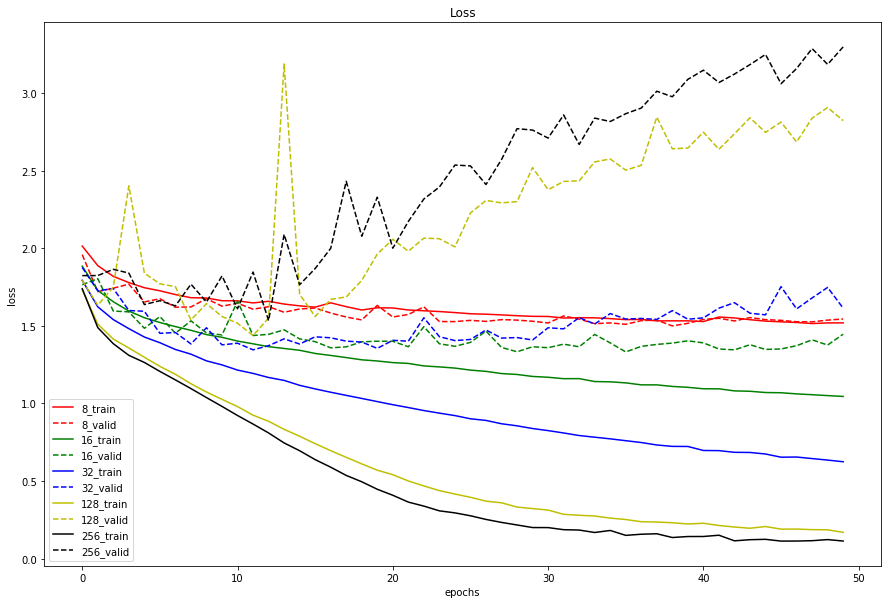

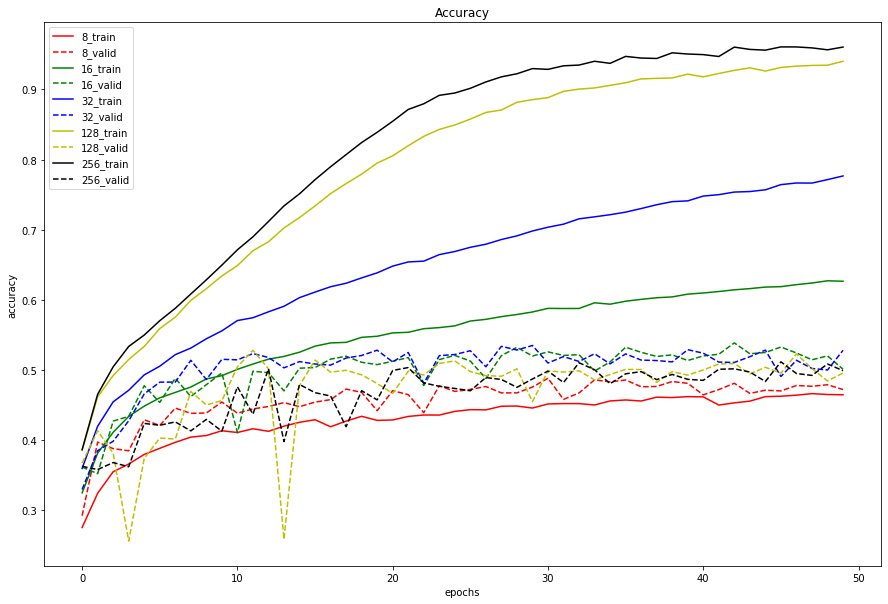

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colors = ['r','g','b','y','k','m']
plt.figure(figsize = (15,10))

for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
    plt.plot(results[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize = (15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_acc'], '-', label = cond + '_train', color = colors[i])
    plt.plot(results[cond]['valid_acc'], '--',label = cond + '_valid', color = colors[i])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
def build_mlp2(input_shape, output_units = 10):
    
    input_layer = Input(input_shape, name = "main_input")
    x = keras.layers.Dense(units = 512)(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 512)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 256)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 256)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 128)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [27]:
model = build_mlp2(x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr = lr)
  
model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs =epochs, shuffle = True, validation_data = [x_test, y_test])


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 33s 668us/step - loss: 1.6347 - acc: 0.4151 - val_loss: 1.9452 - val_acc: 0.3125
Epoch 2/50
50000/50000 [==============================] - 30s 605us/step - loss: 1.3997 - acc: 0.5002 - val_loss: 1.8263 - val_acc: 0.3570
Epoch 3/50
50000/50000 [==============================] - 30s 609us/step - loss: 1.2807 - acc: 0.5437 - val_loss: 1.5925 - val_acc: 0.4431
Epoch 4/50
50000/50000 [==============================] - 36s 724us/step - loss: 1.1926 - acc: 0.5756 - val_loss: 1.9358 - val_acc: 0.3588
Epoch 5/50
50000/50000 [==============================] - 30s 607us/step - loss: 1.1099 - acc: 0.6050 - val_loss: 1.4629 - val_acc: 0.4829
Epoch 6/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.0346 - acc: 0.6336 - val_loss: 1.6537 - val_acc: 0.4593
Epoch 7/50
50000/50000 [==============================] - 28s 564us/step - loss: 0.9652 - acc: 0.6560 - val_loss: 1.

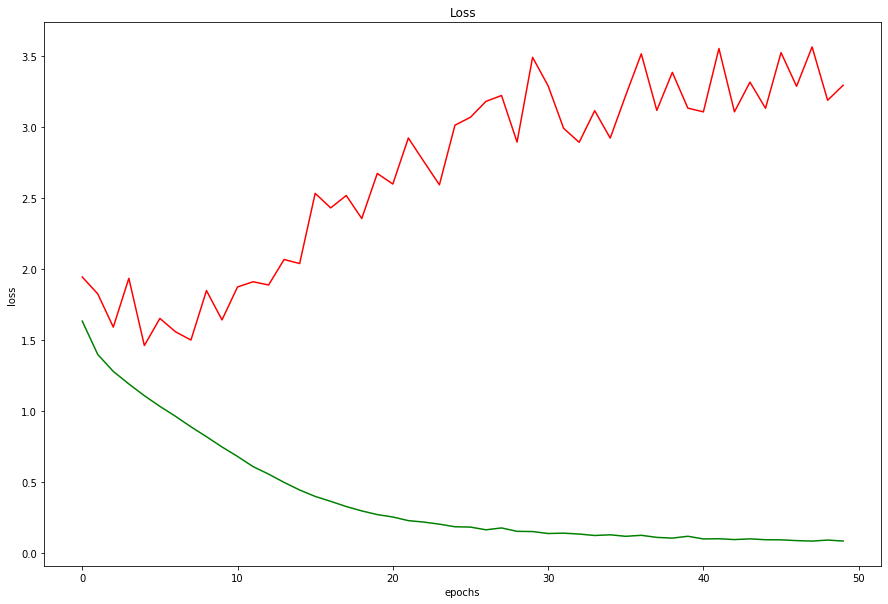

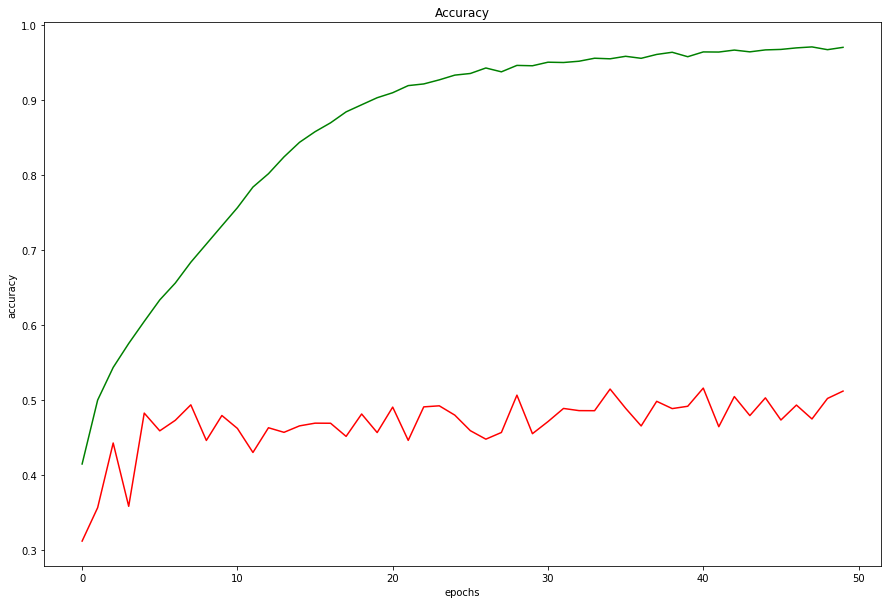

In [28]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label = "train_loss", color = 'g')
plt.plot(history.history['val_loss'], label = "valid_loss", color = 'r')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

plt.figure(figsize = (15,10))
plt.plot(history.history['acc'], label = "train_acc", color = 'g')
plt.plot(history.history['val_acc'], label = "valid_acc", color = 'r')
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.show()

In [29]:
def build_mlp3(input_shape, output_units = 10):
    
    input_layer = Input(input_shape, name = "main_input")
    x = keras.layers.BatchNormalization()(input_layer)
    x = keras.layers.Dense(units = 512)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 512)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 256)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 256)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dense(units = 128)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [30]:
model = build_mlp3(x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr = lr)
  
model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs =epochs, shuffle = True, validation_data = [x_test, y_test])


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 41s 823us/step - loss: 1.6500 - acc: 0.4107 - val_loss: 1.5737 - val_acc: 0.4404
Epoch 2/50
50000/50000 [==============================] - 36s 726us/step - loss: 1.4046 - acc: 0.5006 - val_loss: 1.4149 - val_acc: 0.5007
Epoch 3/50
50000/50000 [==============================] - 36s 722us/step - loss: 1.2854 - acc: 0.5409 - val_loss: 1.3520 - val_acc: 0.5238
Epoch 4/50
50000/50000 [==============================] - 37s 736us/step - loss: 1.1928 - acc: 0.5773 - val_loss: 1.3193 - val_acc: 0.5356
Epoch 5/50
50000/50000 [==============================] - 36s 729us/step - loss: 1.1086 - acc: 0.6055 - val_loss: 1.3121 - val_acc: 0.5399
Epoch 6/50
50000/50000 [==============================] - 36s 722us/step - loss: 1.0379 - acc: 0.6328 - val_loss: 1.3310 - val_acc: 0.5382
Epoch 7/50
50000/50000 [==============================] - 36s 727us/step - loss: 0.9541 - acc: 0.6597 - val_loss: 1.

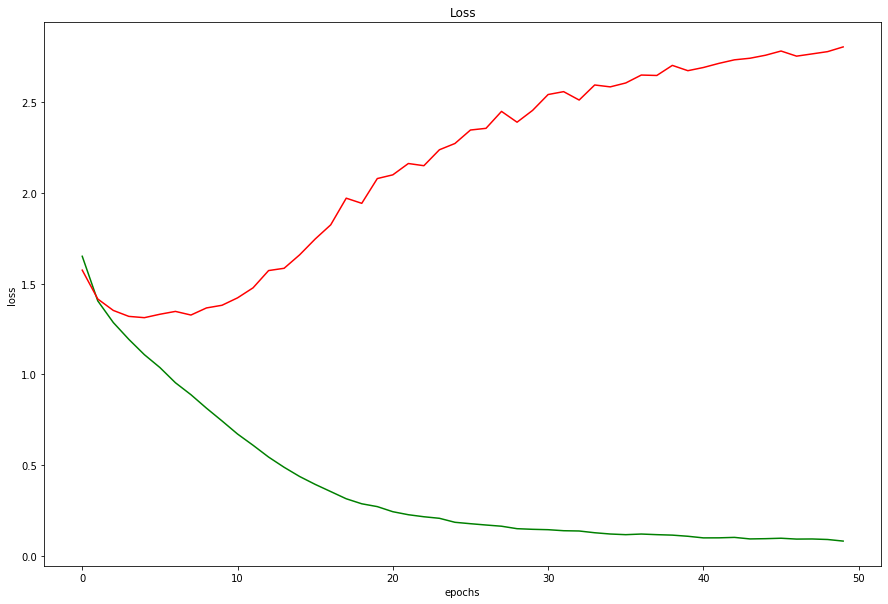

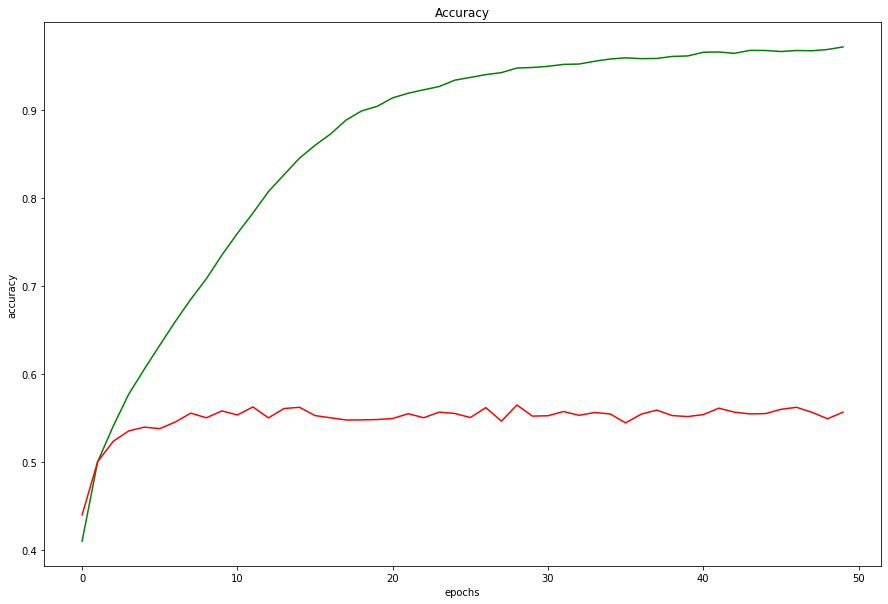

In [31]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label = "train_loss", color = 'g')
plt.plot(history.history['val_loss'], label = "valid_loss", color = 'r')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

plt.figure(figsize = (15,10))
plt.plot(history.history['acc'], label = "train_acc", color = 'g')
plt.plot(history.history['val_acc'], label = "valid_acc", color = 'r')
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.show()